In [27]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap

import keras_tuner as kt
import os
import shutil
import warnings
from imblearn.over_sampling import SMOTE


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, ReLU, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import BinaryCrossentropy
from keras.regularizers import l2


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
url='https://drive.google.com/file/d/1Bxptf-jkiaNftrJ0YthrYwHEi_MptQyt/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
df = df.iloc[:, 1:]

df

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
df.describe()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [33]:
def encode_columns(df):
    df['diagnosis'] = df['diagnosis'].map({
        'M': 1,
        'B': 0,
    })

    return df

df_encoded = encode_columns(df)

df_encoded

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


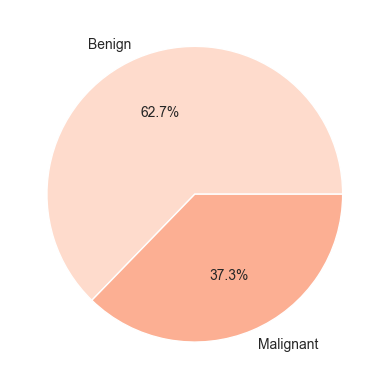

In [34]:
plt.pie(df_encoded['diagnosis'].value_counts(), labels=['Benign', 'Malignant'], colors=sns.color_palette('Reds'), autopct='%1.1f%%')
pass

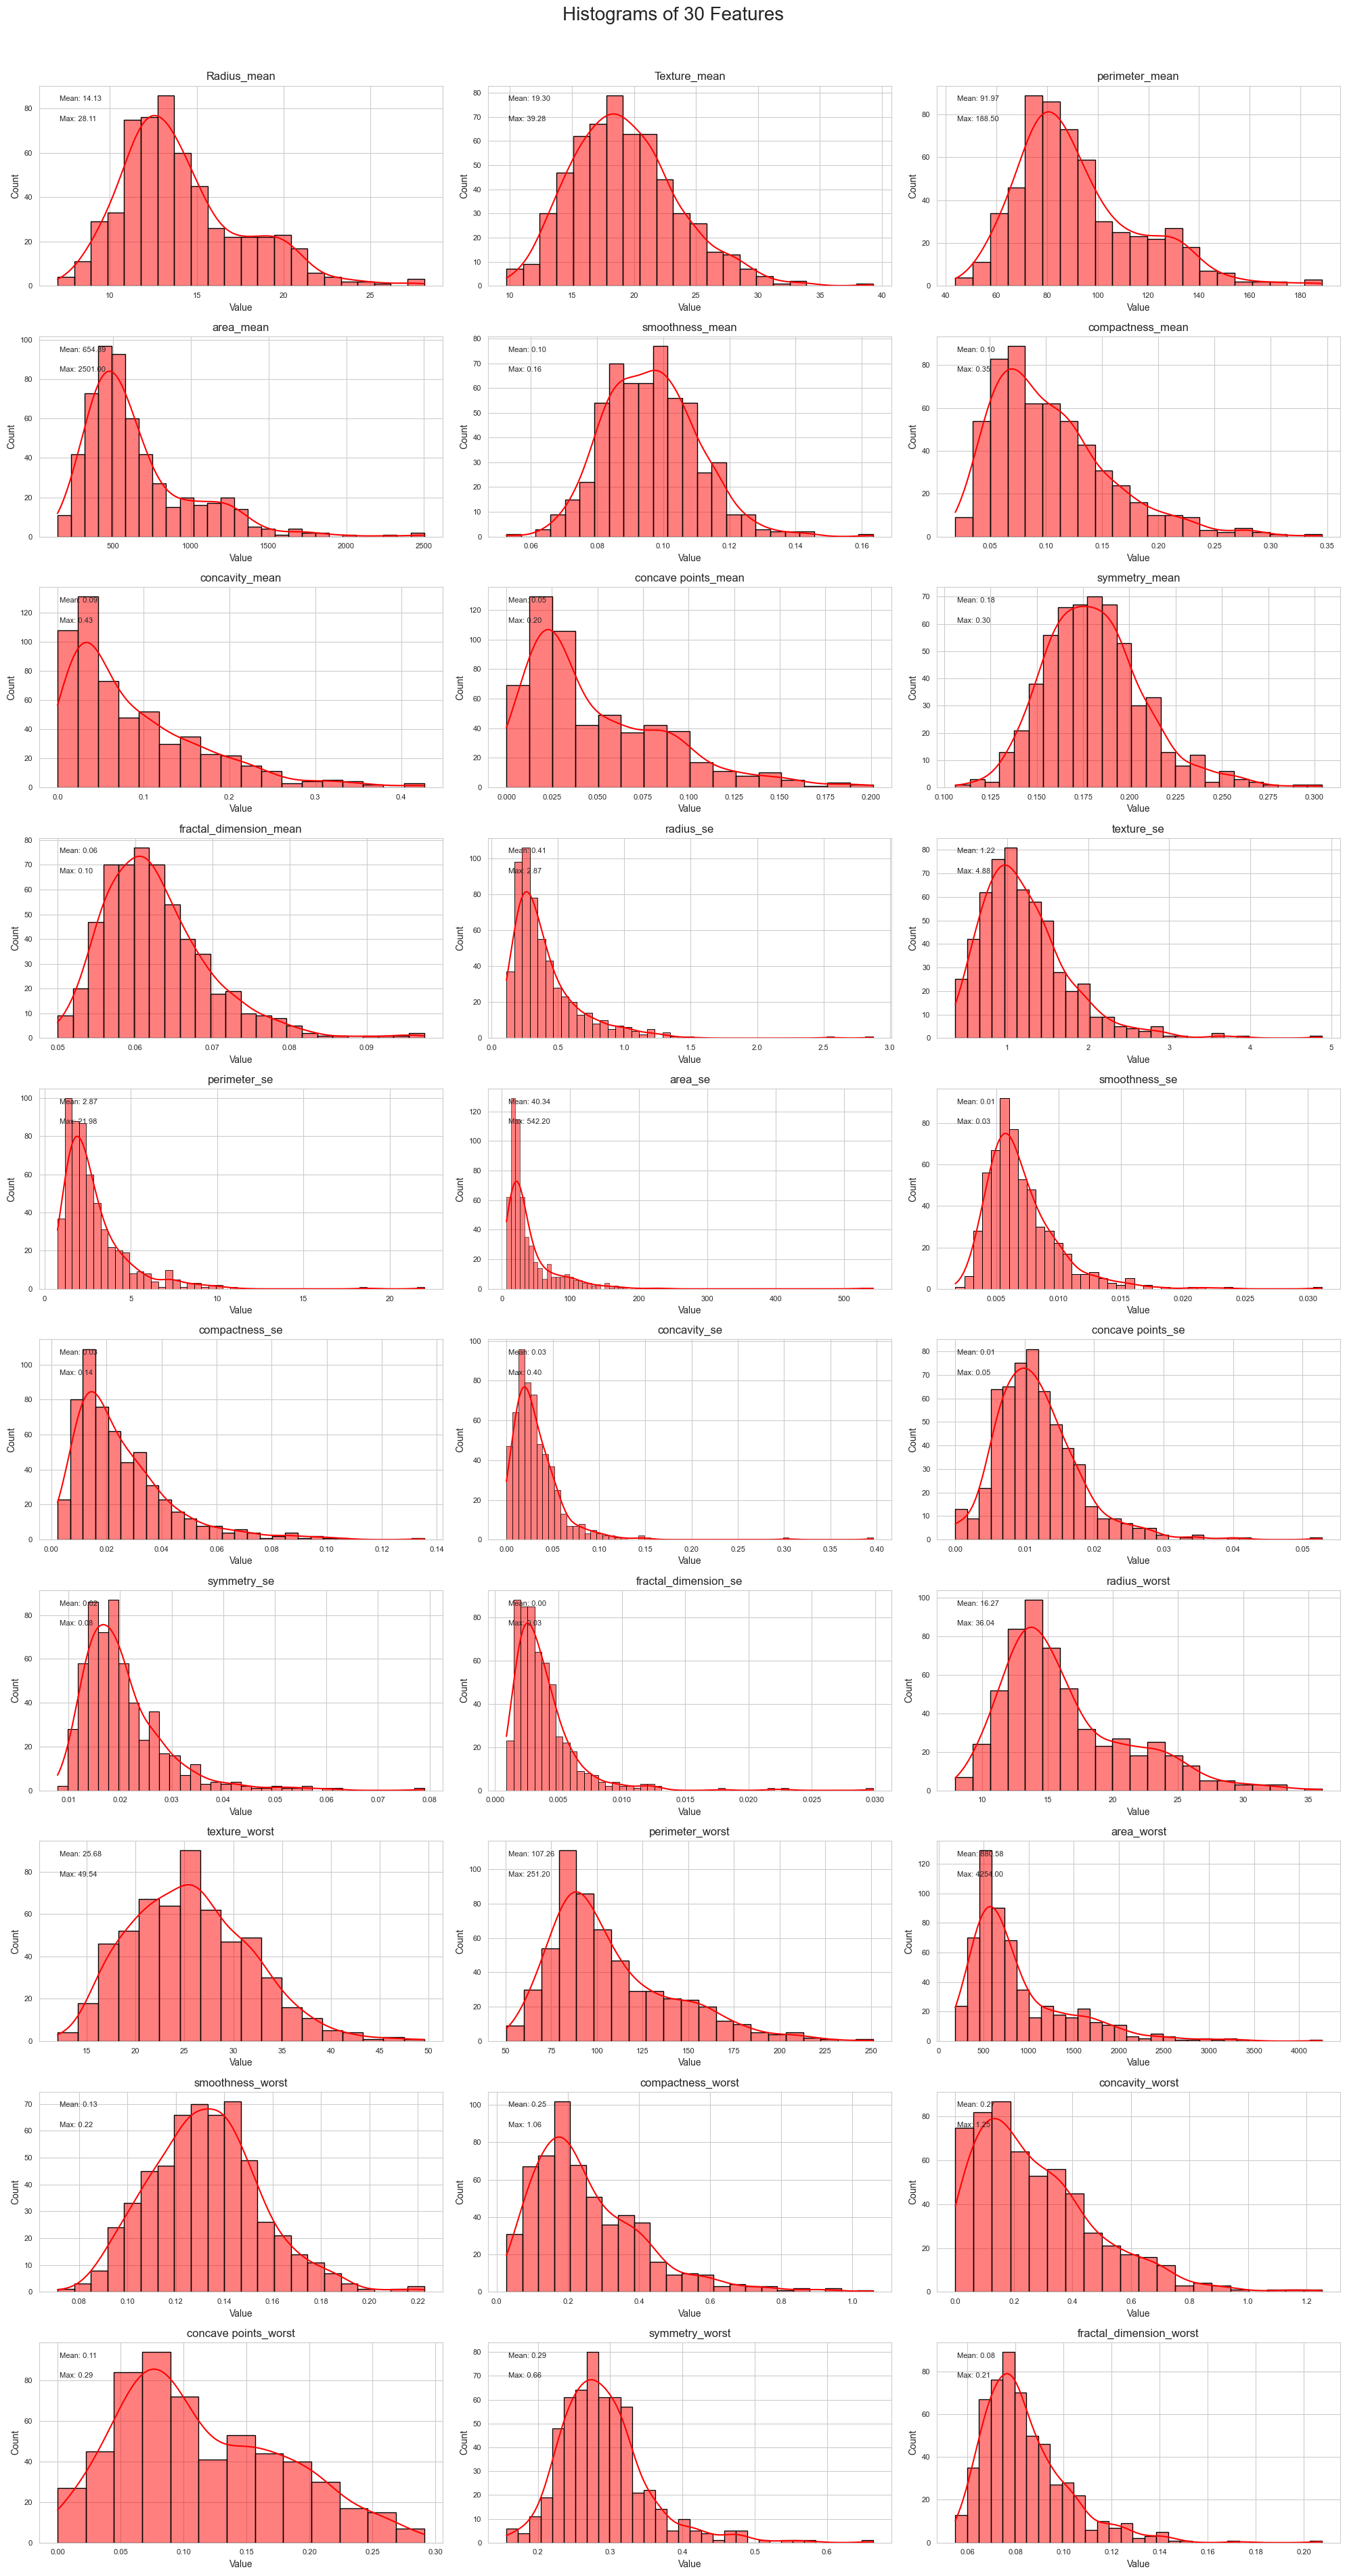

In [35]:
feature_data = df_encoded.drop(columns='diagnosis')

sns.set_style("whitegrid")

fig, axes = plt.subplots(10, 3, figsize=(20, 40))
fig.suptitle('Histograms of 30 Features', fontsize=20)

axes = axes.flatten()

for i, (feature, values) in enumerate(feature_data.items()):
    ax = axes[i]
    
    sns.histplot(data=feature_data, x=feature, ax=ax, kde=True, color='red', edgecolor='black')
    ax.set_title(f'{feature}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    
    mean_val = np.mean(values)
    max_val = np.max(values)
    ax.text(0.05, 0.95, f'Mean: {mean_val:.2f}', transform=ax.transAxes, verticalalignment='top', fontsize=8)
    ax.text(0.05, 0.85, f'Max: {max_val:.2f}', transform=ax.transAxes, verticalalignment='top', fontsize=8)

    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

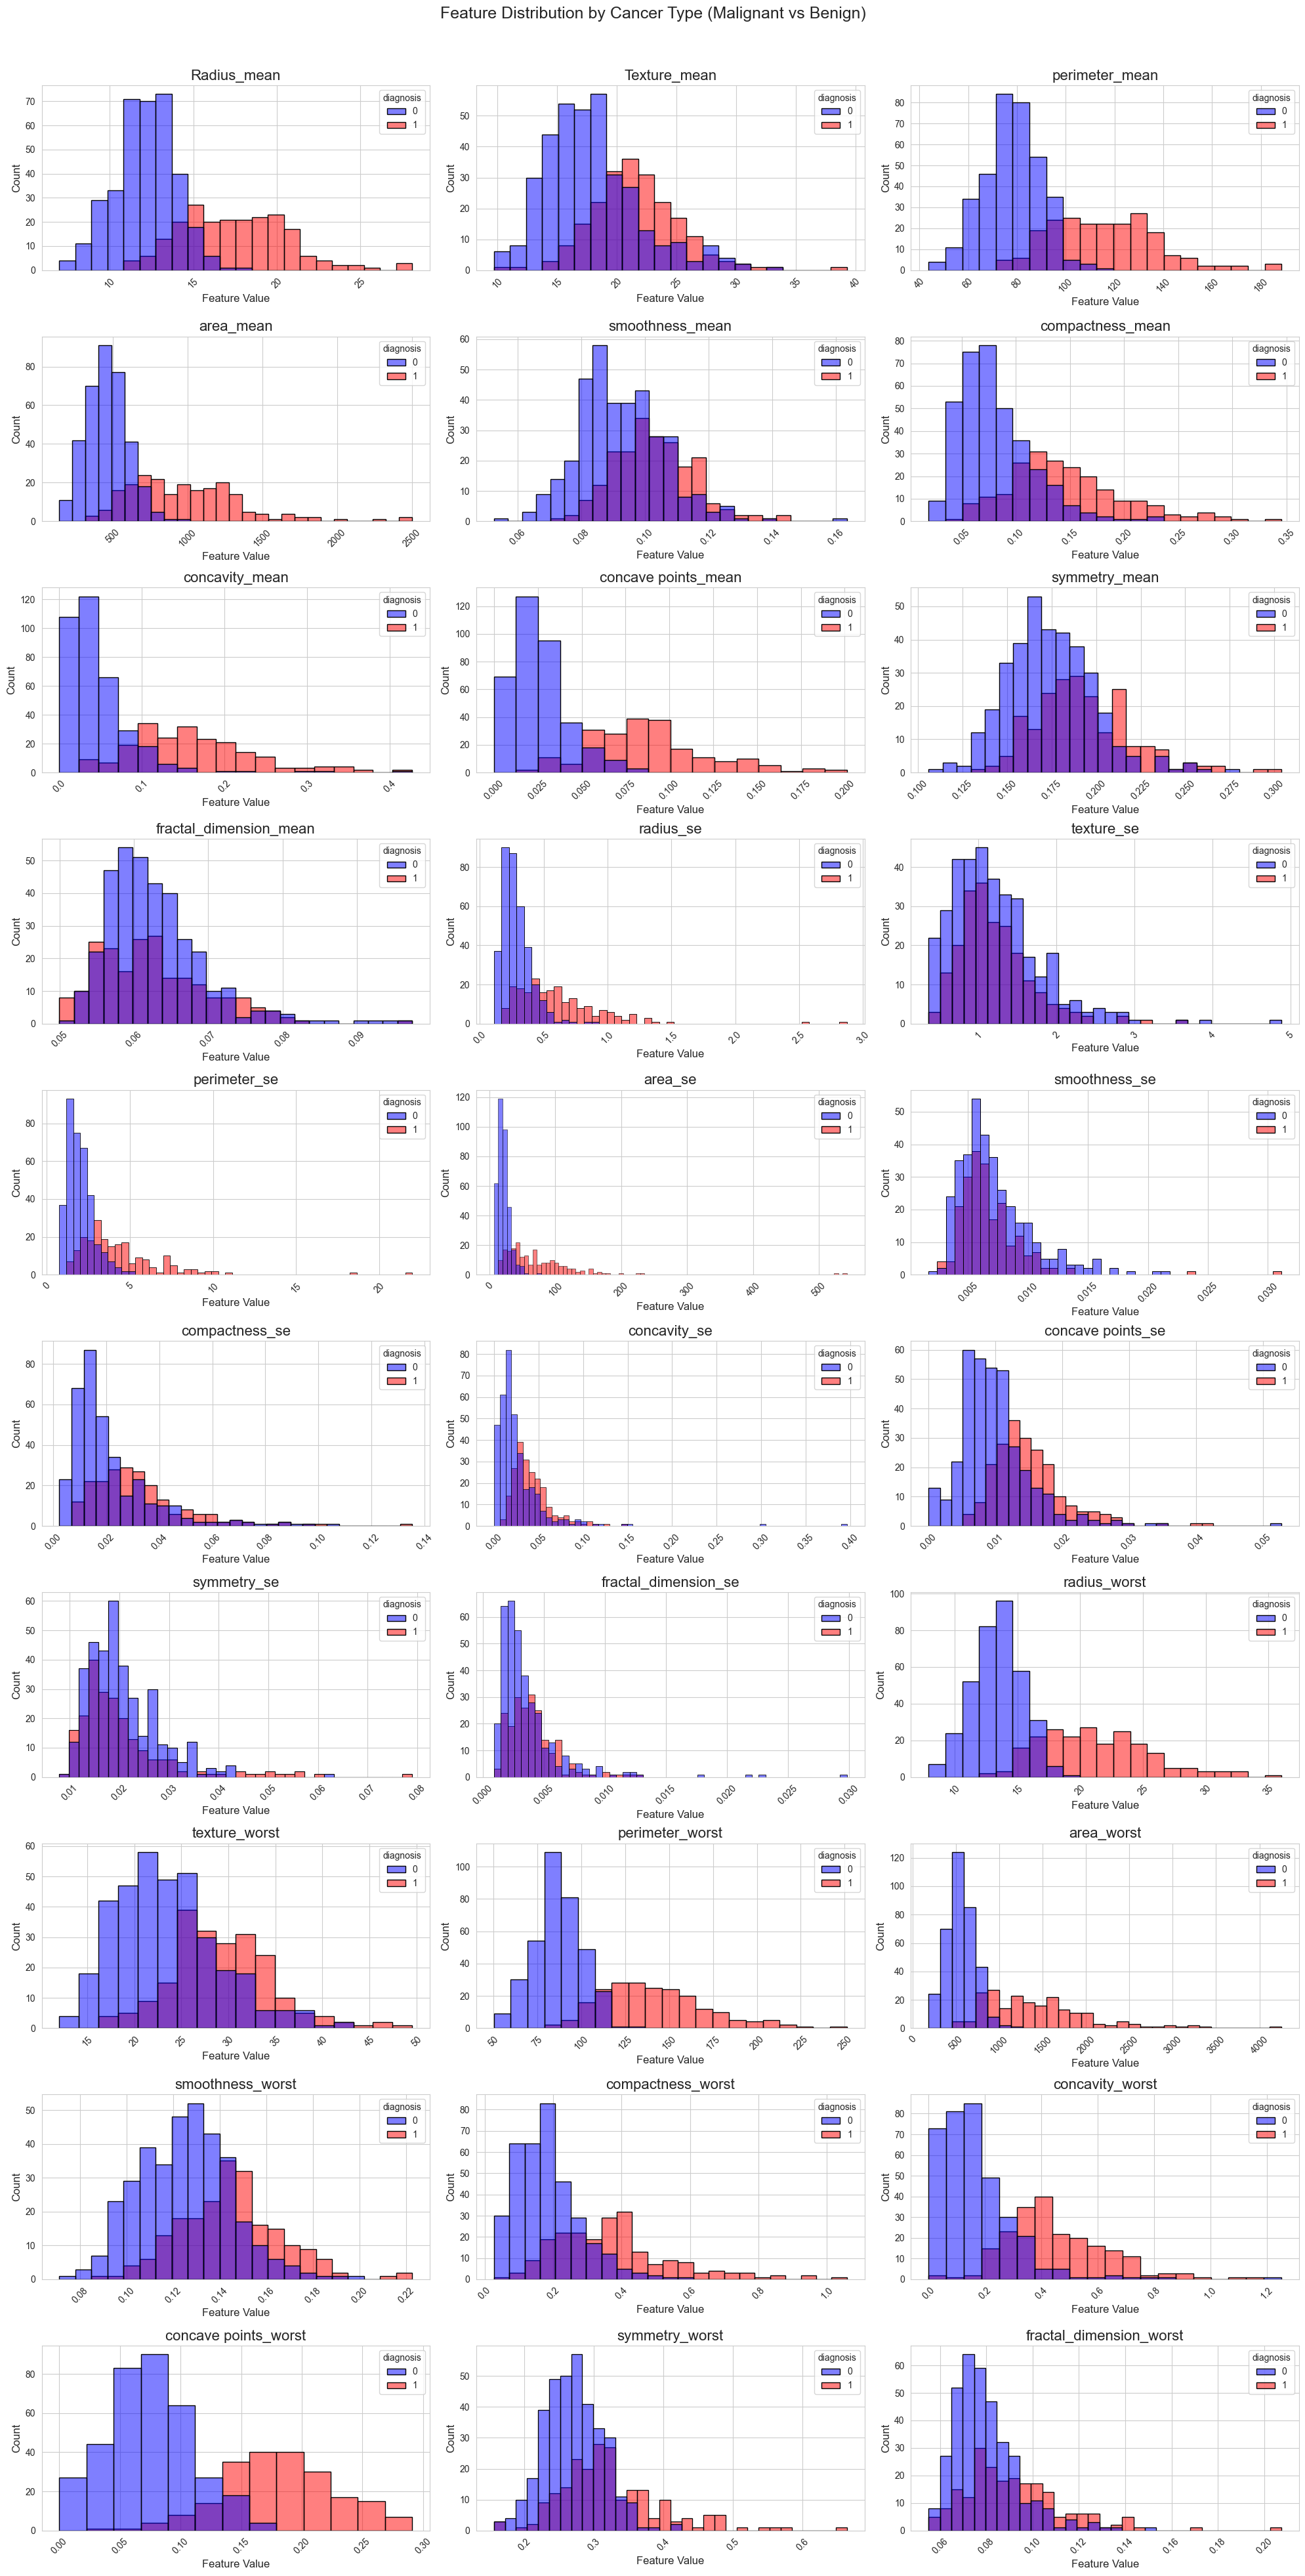

In [36]:
import math

sns.set_style("whitegrid")

features = df_encoded.columns.drop('diagnosis').tolist()

fig, axes = plt.subplots(10, 3, figsize=(20, 40))
fig.suptitle('Feature Distribution by Cancer Type (Malignant vs Benign)', fontsize=18)

axes = axes.flatten()

color_palette = {0: 'blue', 1: 'red'}

for i, feature in enumerate(features):
    ax = axes[i]
    
    sns.histplot(data=df_encoded, x=feature, hue='diagnosis',
                 palette=color_palette, multiple='layer', edgecolor='black', alpha=0.5, ax=ax)
    
    ax.set_title(feature, fontsize=16)
    ax.set_xlabel('Feature Value', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    ax.tick_params(axis='x', rotation=45,)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()

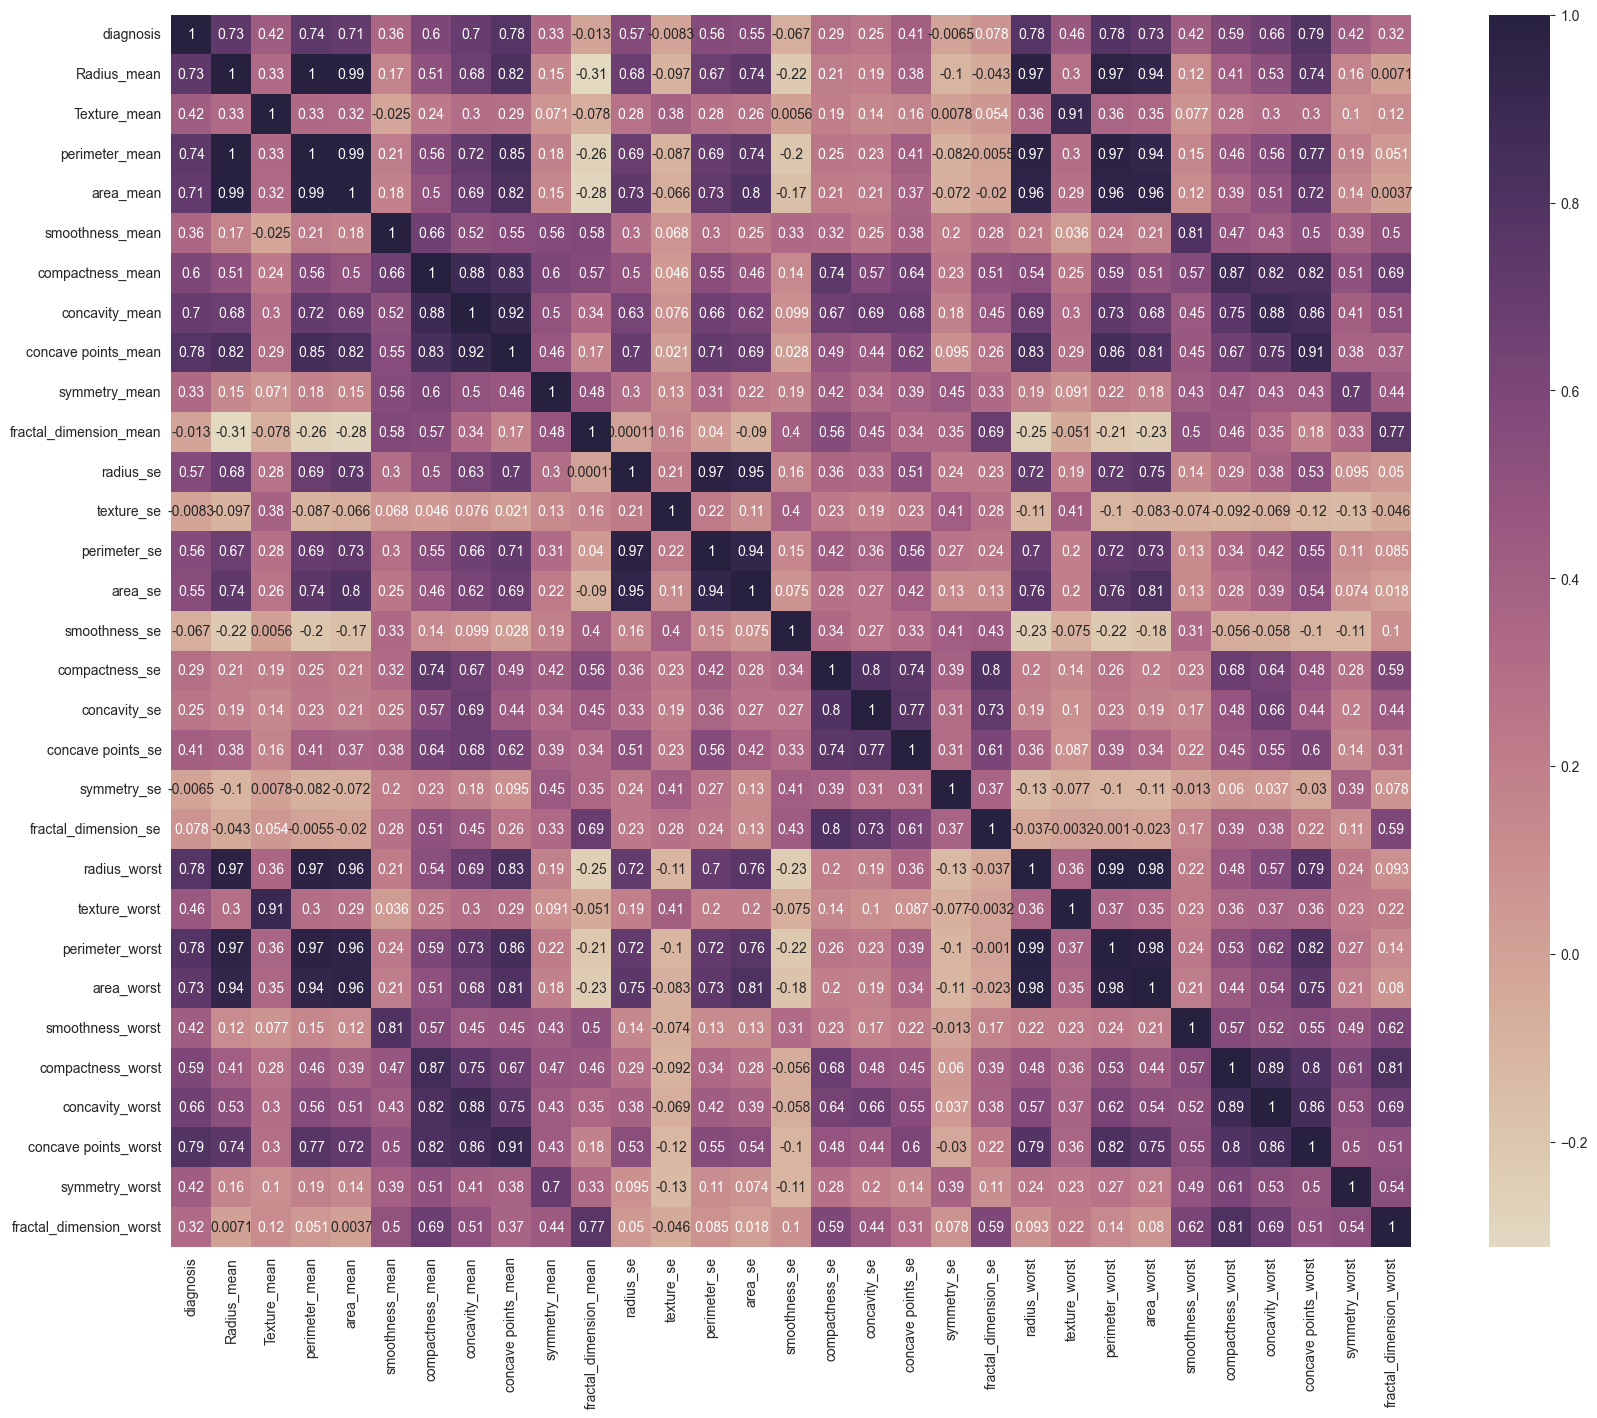

In [37]:
corr_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
pass

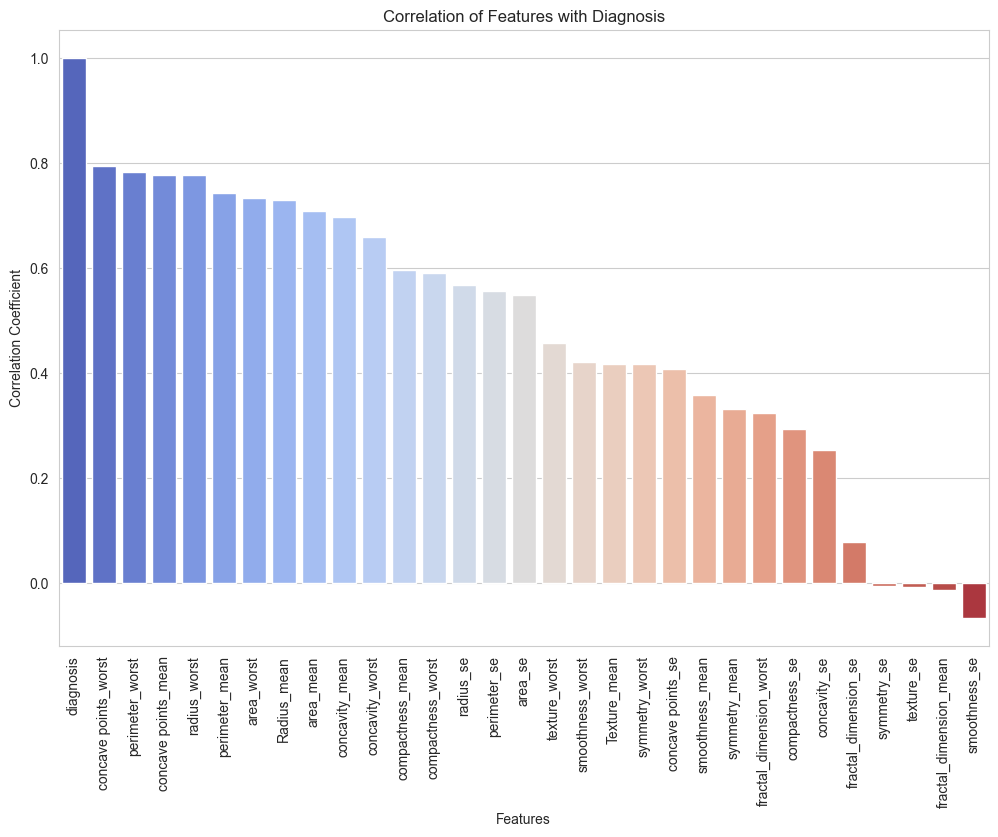

In [38]:
correlation_matrix = df_encoded.corr()

correlation_with_diagnosis = correlation_matrix['diagnosis'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_diagnosis.index, y=correlation_with_diagnosis.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Diagnosis')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

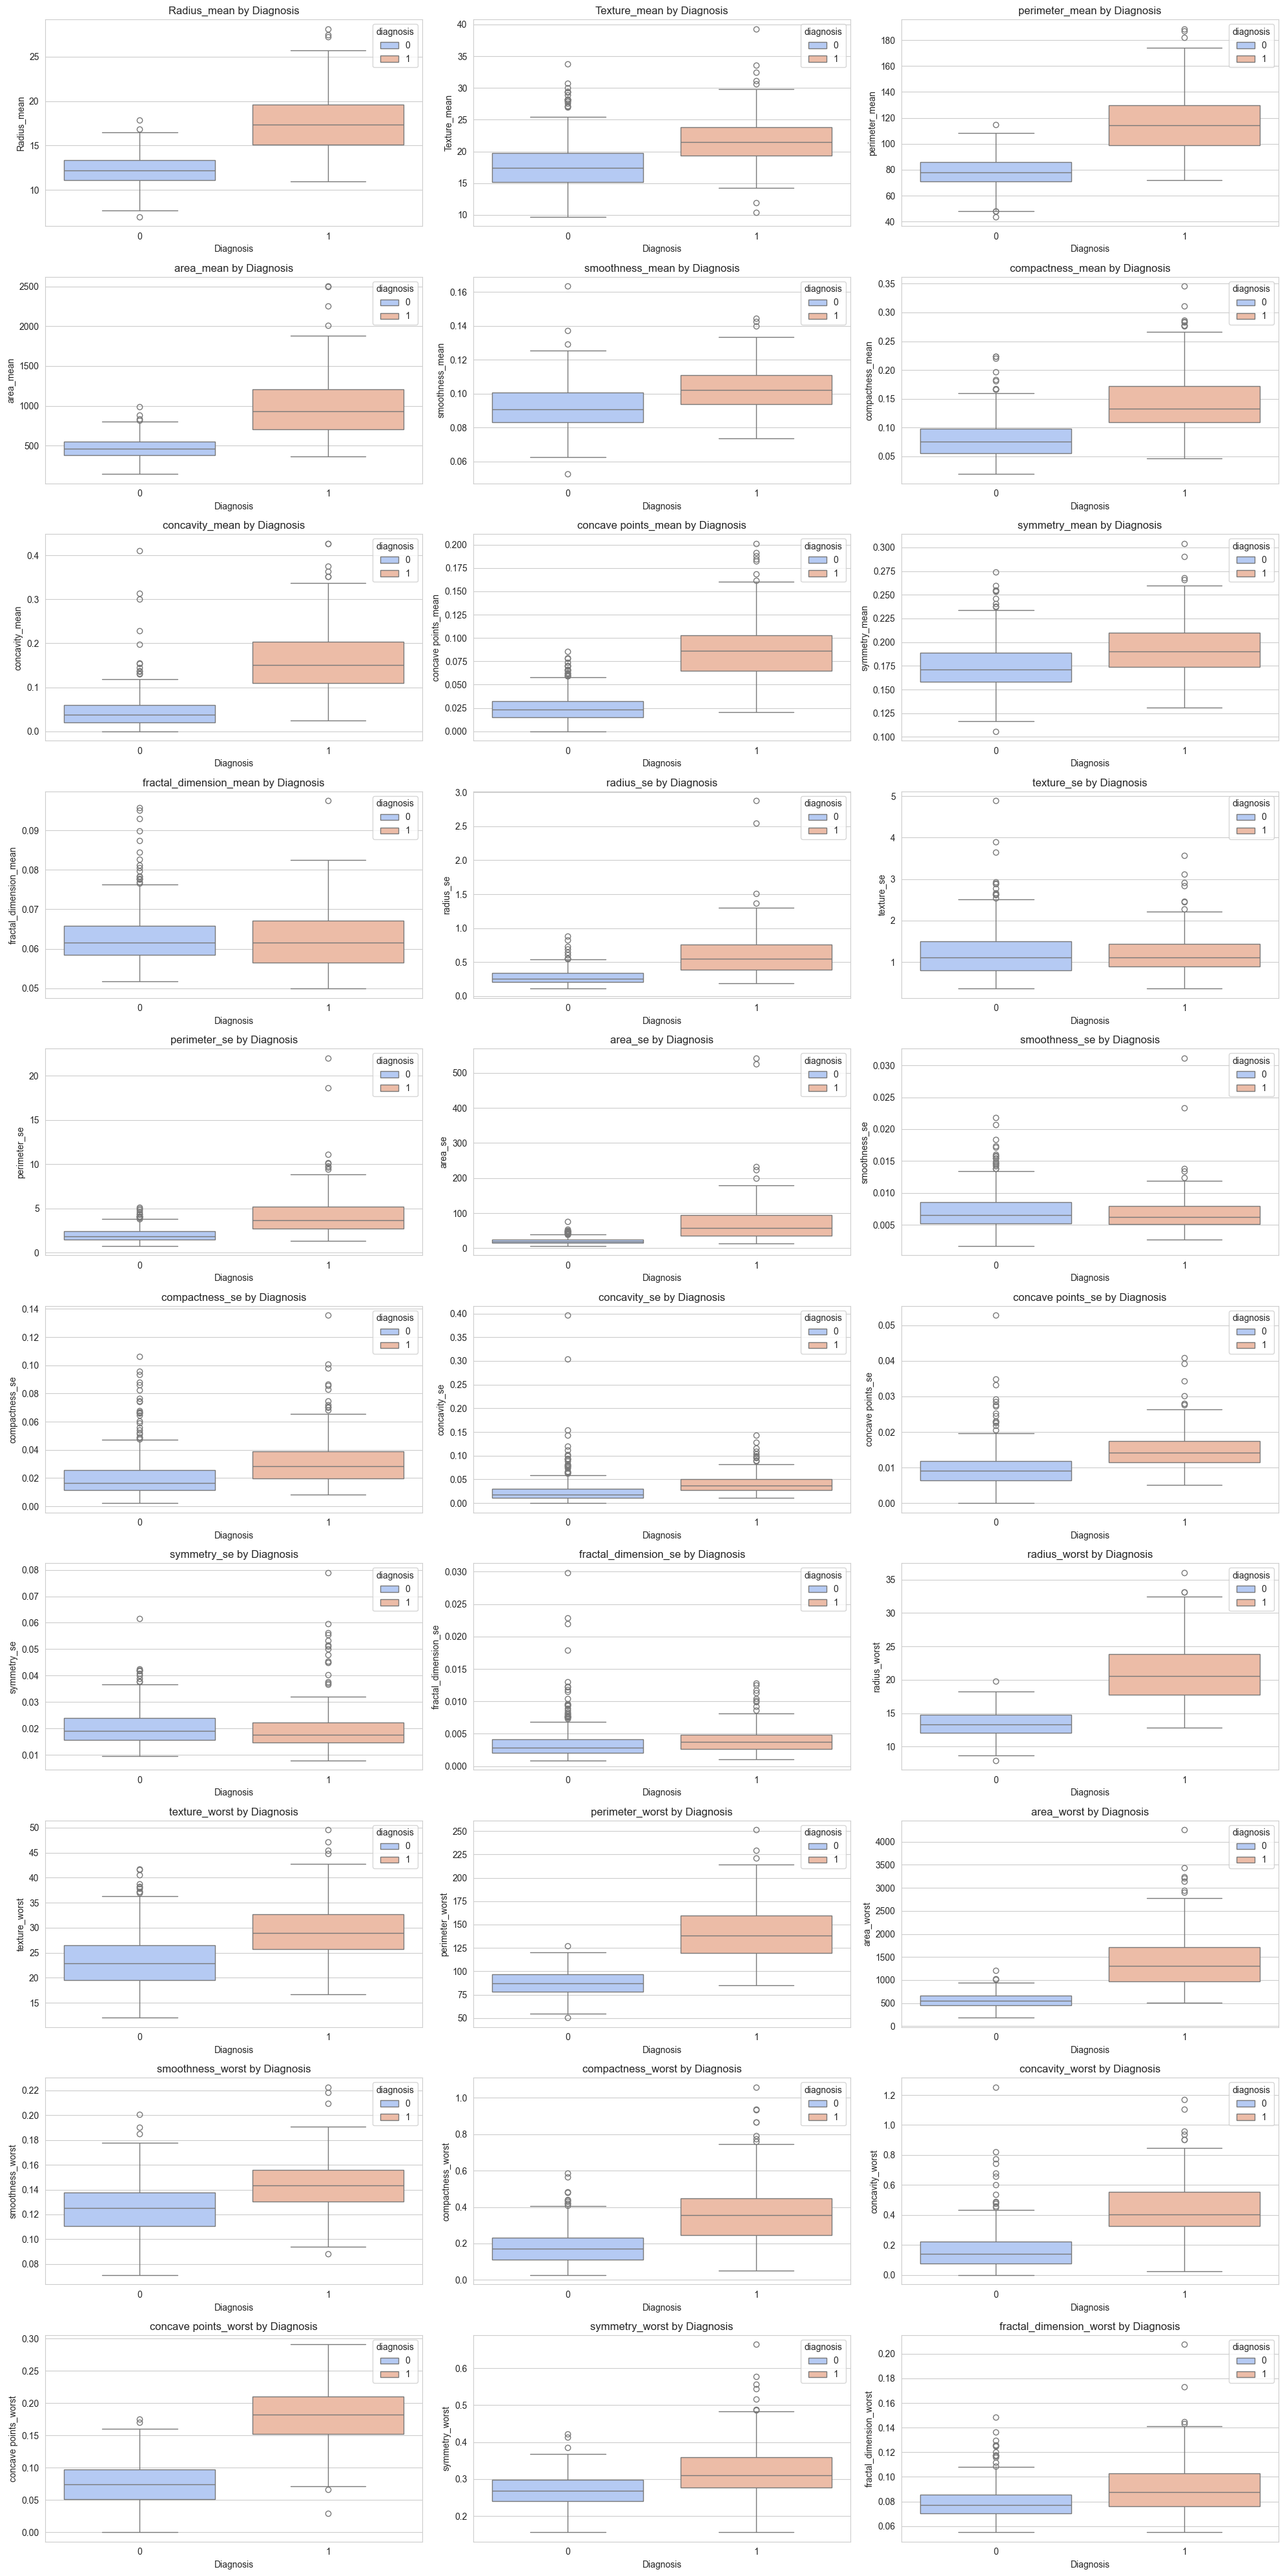

In [39]:
feature_data = df_encoded.drop(columns='diagnosis')

fig, axes = plt.subplots(10, 3, figsize=(20, 40))

axes = axes.flatten()

for i, feature in enumerate(feature_data):
    sns.boxplot(x='diagnosis', y=feature, data=df_encoded, hue='diagnosis', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{feature} by Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [40]:
# Pisahkan fitur dan label
X = df_encoded.drop(columns='diagnosis')
y = df_encoded['diagnosis']

# Normalisasi data fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi train dan test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42,
)

# Membagi train set menjadi train dan validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42,
)

# Menampilkan ukuran dataset setelah split
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (364, 30), (364,)
Val: (91, 30), (91,)
Test: (114, 30), (114,)


In [41]:
# Terapkan SMOTE untuk menyeimbangkan kelas pada data training
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (462, 30), (462,)
Val: (91, 30), (91,)
Test: (114, 30), (114,)


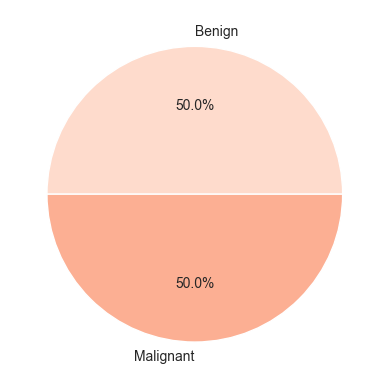

In [42]:
plt.pie(y_train.value_counts(), labels=['Benign', 'Malignant'], colors=sns.color_palette('Reds'), autopct='%1.1f%%')
pass

In [43]:
class Model(kt.HyperModel):
  def build(self, hp: kt.HyperParameters):
    hp_layer         = hp.Int('num_layers', min_value=2, max_value=3)
    hp_units         = lambda i: hp.Int(f'units_{i}', min_value=16, max_value=64, step=16)
    hp_activation    = lambda i: hp.Choice(f'activation_{i}', ['relu', 'tanh'])
    hp_dropout       = lambda i: hp.Float(f'dropout_{i}', min_value=0, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=8e-4, sampling='linear')

    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    for i in range(hp_layer):
      model.add(Dense(units=hp_units(i+1), activation=hp_activation(i+1)))
      model.add(BatchNormalization())
      model.add(Dropout(hp_dropout(i+1)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

  def fit(self, hp: kt.HyperParameters, model: keras.Model, *args, **kwargs):

    return model.fit(
      *args,
      batch_size=X_train.shape[0],
      **kwargs,
    )

In [44]:
project_name = 'breast_cencer'
directory = f'./{project_name}'

if os.path.exists(directory):
  shutil.rmtree(directory)
  os.makedirs(directory)

tuner = kt.Hyperband(
  Model(),
  objective='val_accuracy',
  max_epochs=250,
  factor=10,
  project_name=project_name,
)

tuner.search_space_summary()

Search space summary
Default search space size: 8
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.0008, 'step': None, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'

In [45]:
tuner_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[tuner_callback])

Trial 176 Complete [00h 00m 21s]
val_accuracy: 0.8681318759918213

Best val_accuracy So Far: 0.9670329689979553
Total elapsed time: 00h 23m 02s


In [46]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'num_layers': 2,
 'learning_rate': 0.0005942748279364071,
 'units_1': 32,
 'activation_1': 'tanh',
 'dropout_1': 0.1,
 'units_2': 16,
 'activation_2': 'tanh',
 'dropout_2': 0.2,
 'units_3': 16,
 'activation_3': 'relu',
 'dropout_3': 0.30000000000000004,
 'tuner/epochs': 25,
 'tuner/initial_epoch': 3,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0041'}

In [47]:
model_tuned = tuner.hypermodel.build(best_hps)
model_tuned.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 96 (384.00 B)

In [48]:
callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model_tuned.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')), loss=BinaryCrossentropy(), metrics=['accuracy'])

history = model_tuned.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=X_train.shape[0], callbacks=[callback])

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4697 - loss: 0.9053 - val_accuracy: 0.4725 - val_loss: 0.7520
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5022 - loss: 0.8925 - val_accuracy: 0.5165 - val_loss: 0.7300
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5433 - loss: 0.8194 - val_accuracy: 0.5824 - val_loss: 0.7087
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5541 - loss: 0.8150 - val_accuracy: 0.6264 - val_loss: 0.6878
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6190 - loss: 0.7104 - val_accuracy: 0.6484 - val_loss: 0.6676
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5866 - loss: 0.7371 - val_accuracy: 0.6923 - val_loss: 0.6481
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6212 - loss: 0.7035 - val_accuracy: 0.7033 - val_loss: 0.6291
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6797 - loss: 0.6398 - val_accuracy: 0.7143 - val_loss: 0

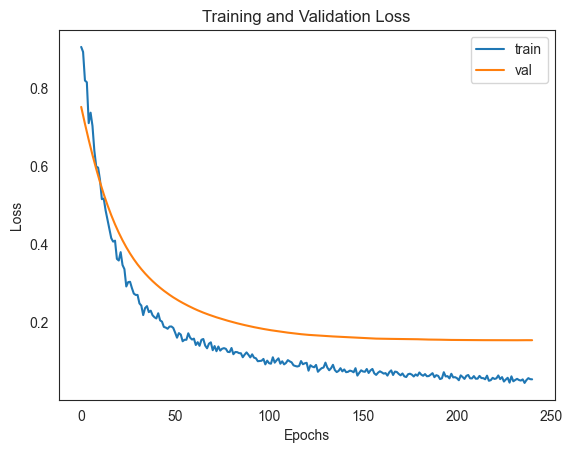

In [53]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

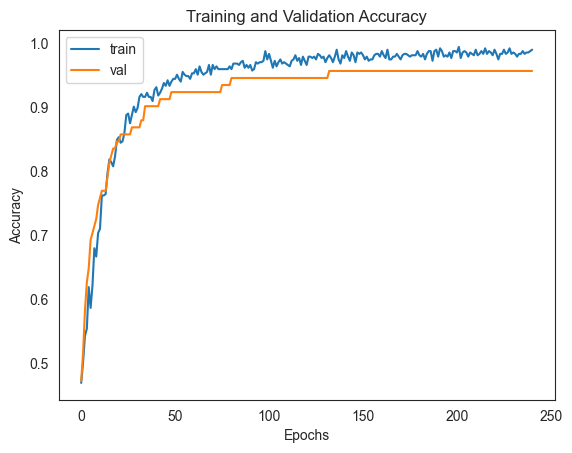

In [54]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
test_loss, test_accuracy = model_tuned.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0819 
Test Loss: 0.06834910064935684
Test Accuracy: 0.9824561476707458


In [51]:
y_pred_prob = model_tuned.predict(X_test)  
y_pred = (y_pred_prob > 0.5).astype(int) 

print("Classification Report:\n", classification_report(y_test, y_pred))

score_dict = {
    'model': {
        'roc_auc_score': roc_auc_score(y_test, y_pred_prob),  
        'f1_score': f1_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'accuracy_score': accuracy_score(y_test, y_pred),
    }
}

print("Evaluation Scores:")
print(f"Accuracy Score: {score_dict['model']['accuracy_score']}")
print(f"Precision: {score_dict['model']['precision']}")
print(f"Recall: {score_dict['model']['recall']}")
print(f"F1 Score: {score_dict['model']['f1_score']}")
print(f"ROC AUC Score: {score_dict['model']['roc_auc_score']}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Evaluation Scores:
Accuracy Score: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score: 0.9767441860465116
ROC AUC Score: 0.9970520799213888


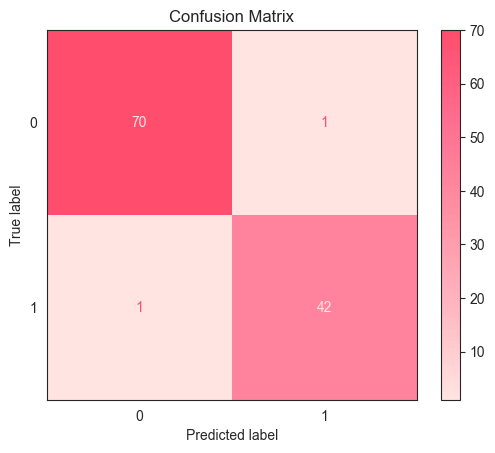

In [52]:
pink_palette = ["#ffe4e1", "#ffb6c1", "#ff91a4", "#ff6f91", "#ff4d6d"]

cmap = LinearSegmentedColormap.from_list("custom_pink", pink_palette, N=100)

sns.set_style('white')

ConfusionMatrixDisplay.from_predictions(y_test.values, y_pred, cmap=cmap)

plt.title('Confusion Matrix')

plt.show()
